# Desafio: Frequências e medidas

#### **Grupo:** Sarah Gilbert - Bootcamp Analytics

#### **Integrantes:**
- Anna Beatriz M. Vercesi
- Fernanda Pilat
- Izabelle Nunes
- Karina Cunha
- Joannyta Reis
- Luene Pizzi
- Thaís Faustino
- Priscila Mendes


O Conjunto de dados, oriundo do Kaggle, consiste em registros fictícios de notas obtidas por alunos em três disciplinas e suas informações pessoais. 

**Variáveis:**
```markdown
1. gender: gênero do aluno.
2. race/ethnicity: raça/etnia dos alunos.
3. parental level of education: grau de escolaridade dos pais.
4. lunch: tipo de almoço.
5. test preparation course: indica se fez curso preparatório.
6. math score: nota na prova de matematica.
7. reading score: nota na prova de leitura.
8. writing score: nota na prova de escrita.
```

### 1. A lógica utilizada para a solução do desafio

In [ ]:
#@title
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#@title
#Import direto do arquivo, precisa subir o .csv antes de executar

dados = pd.read_csv('StudentsPerformance.csv')

#######

#Import usando google.colab, ligado à pasta do drive da Priscila

#from google.colab import drive

#drive.mount('/content/drive', force_remount=True)
#dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WMC Bootcamp/Desafio Estatística/Apresentação 21_03/StudentsPerformance.csv')

In [ ]:
#@title
dados.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


General Mean (Média Geral): variável criada representando a média das notas das três disciplinas já existentes na base de dados.

In [ ]:
dados['general mean'] = ((dados['math score'] + dados['reading score'] + dados['writing score'])/ 3). round(2)

### <font color=#334195>**Variáveis Qualitativas**</font>

```markdown
1. gender: gênero do aluno.
2. race/ethnicity: raça/etnia dos alunos.
3. parental level of education: grau de escolaridade dos pais.
4. lunch: tipo de almoço.
5. test preparation course: indica se fez curso preparatório.
```


- A variável *parental level of education* é qualitativa ordinal
- A variável *lunch* é referente a taxa paga pelos alunos pelo almoço na escola. *Standard* é o preço padrão, e *free/reduced* é a refeição que possui uma valor reduzido ou gratuito. Fonte: https://schoolnutrition.org/about-school-meals/school-meal-statistics/

**Frequências**

- Gênero. 

In [ ]:
#@title
frequencia_genero= dados['gender'].value_counts(ascending = True)
porcentagem_genero = dados['gender'].value_counts(normalize = True) * 100

pd.DataFrame(
    {
        'Frequência': frequencia_genero, 'Porcentagem (%)': porcentagem_genero
     }
     )

,Frequência,Porcentagem (%)
female,518,51.8
male,482,48.2


Text(0.5, 0.98, 'Gênero')

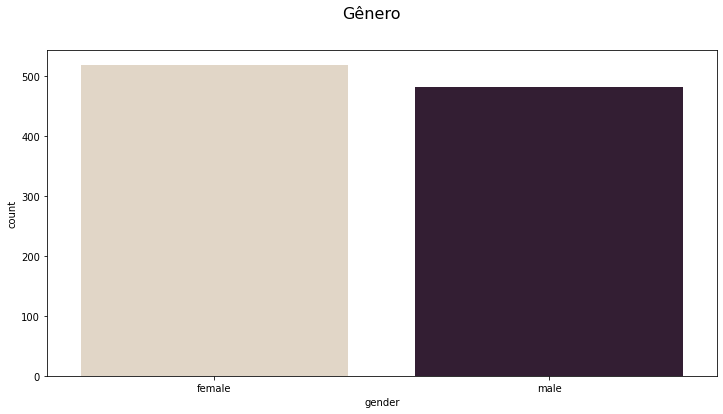

In [ ]:
#@title
ax = sns.countplot(data = dados, x = 'gender', palette='ch:.25')

ax.figure.set_size_inches(12,6)
ax.figure.suptitle('Gênero', fontsize = 16)

- Grupos raciais/étnicos.

In [ ]:
#@title
frequencia_Race = dados['race/ethnicity'].value_counts()
porcentagem_Race = dados['race/ethnicity'].value_counts(normalize = True) * 100

pd.DataFrame(
    {
        'Frequência': frequencia_Race, 'Porcentagem (%)': porcentagem_Race
     }, index = ['group A', 'group B', 'group C', 'group D', 'group E']
     )

,Frequência,Porcentagem (%)
group A,89,8.9
group B,190,19.0
group C,319,31.9
group D,262,26.2
group E,140,14.0


Text(0.5, 0.98, 'Grupos raciais')

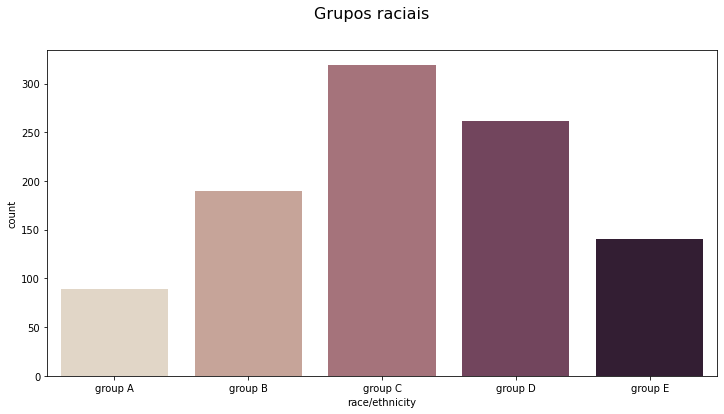

In [ ]:
#@title
ax = sns.countplot(data = dados, x = 'race/ethnicity', palette='ch:.25',
              order = ['group A', 'group B', 'group C', 'group D', 'group E'])

ax.figure.set_size_inches(12,6)
ax.figure.suptitle('Grupos raciais', fontsize = 16)

- Grau de escolaridade dos pais

In [ ]:
#@title
frequencia_EdParental = dados['parental level of education'].value_counts()
porcentagem_EdParental = dados['parental level of education'].value_counts(normalize = True) * 100

pd.DataFrame(
    {
        'Frequência': frequencia_EdParental, 'Porcentagem (%)': porcentagem_EdParental
     }, index = ["some high school", "high school", "associate's degree", 
                            "some college", "bachelor's degree", "master's degree"]
     )

,Frequência,Porcentagem (%)
some high school,179,17.9
high school,196,19.6
associate's degree,222,22.2
some college,226,22.6
bachelor's degree,118,11.8
master's degree,59,5.9


Text(0.5, 0.98, 'Frequência dos níveis de educação dos pais ')

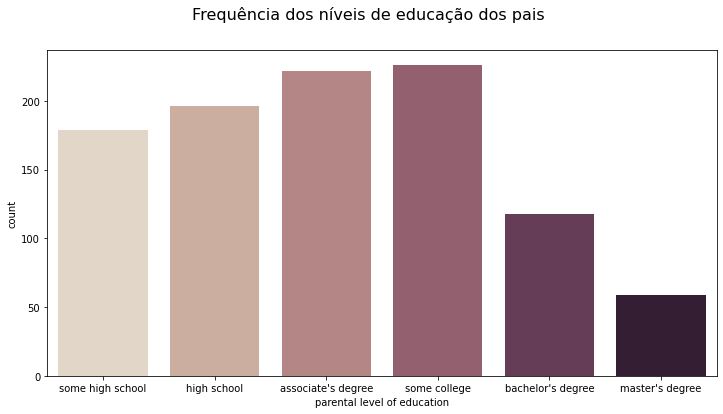

In [ ]:
#@title
ax = sns.countplot(data = dados, x = 'parental level of education', palette='ch:.25',
              order = ["some high school", "high school", "associate's degree", 
                            "some college", "bachelor's degree", "master's degree"])

ax.figure.set_size_inches(12,6)
ax.figure.suptitle('Frequência dos níveis de educação dos pais ', fontsize = 16)

- Tipo de almoço.

In [ ]:
#@title
frequencia_Lunch = dados['lunch'].value_counts(ascending = True)
porcentagem_Lunch = dados['lunch'].value_counts(normalize = True) * 100

pd.DataFrame(
    {
        'Frequência': frequencia_Lunch, 'Porcentagem (%)': porcentagem_Lunch
     }
     )

,Frequência,Porcentagem (%)
free/reduced,355,35.5
standard,645,64.5


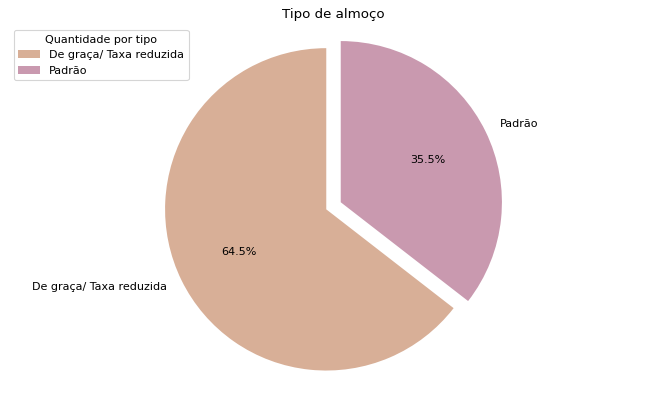

In [ ]:
from matplotlib.cm import cmaps_listed
#@title
labels = ['De graça/ Taxa reduzida', 'Padrão']
quantidades = [645,355]
cores = ['#d8af97', '#c999af']
explode = (0, 0.1)


plt.figure(figsize=(10.5, 6), dpi=80)

plt.pie(quantidades, explode=explode, labels=labels, colors=cores,
        autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Tipo de almoço')
plt.legend(title='Quantidade por tipo', loc = 'upper left')
plt.show()

- Curso de preparação para o teste

In [ ]:
#@title
frequencia_Test = dados['test preparation course'].value_counts(ascending = True)
porcentagem_Test = dados['test preparation course'].value_counts(normalize = True) * 100

pd.DataFrame(
    {
        'Frequência': frequencia_Test, 'Porcentagem (%)': porcentagem_Test
     }
     )

,Frequência,Porcentagem (%)
completed,358,35.8
none,642,64.2


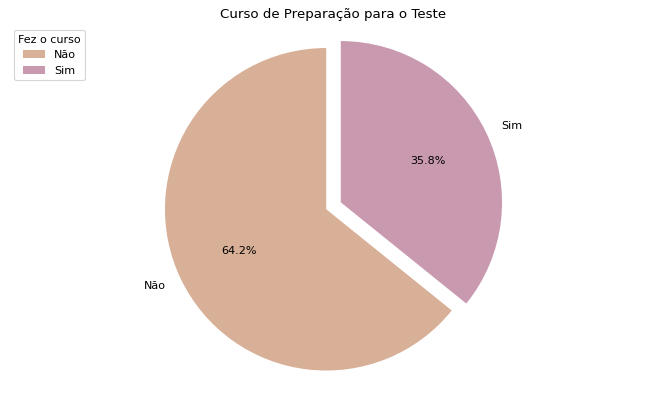

In [ ]:
#@title
labels = ['Não', 'Sim']
quantidades = [642,358]
cores = ['#d8af97', '#c999af']
explode = (0, 0.1)

plt.figure(figsize=(10.5, 6), dpi=80)
plt.pie(quantidades, explode=explode, labels=labels, colors=cores,
        autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Curso de Preparação para o Teste')
plt.legend(title='Fez o curso', loc = 'upper left')
plt.show()

### <font color=#334195>**Variáveis Quantitativas**</font>

```markdown
1. math score: nota na prova de matemática
2. reading score: nota na prova de leitura
3. writing score: nota na prova de escrita
4. general mean: média geral entre todas as notas na prova
```

#### <font color=#334195>**Relações entre variáveis**</font>

In [ ]:
#@title
dados_medias_2 = dados.groupby(['parental level of education'], as_index=False)['reading score'].mean()
dados_medias_3 = dados.groupby(['parental level of education'], as_index=False)['writing score'].mean()
dados_medias = dados.groupby(['parental level of education'], as_index=False)['math score'].mean()

dados_medias['reading score'] = dados_medias_2['reading score']
dados_medias['writing score'] = dados_medias_3['writing score']
dados_medias

,parental level of education,reading score
0,associate's degree,70.927928
1,bachelor's degree,73.000000
2,high school,64.704082
3,master's degree,75.372881
4,some college,69.460177
5,some high school,66.938547


Text(0.5, 0.98, 'Média das notas das matérias por Níveis de educação dos pais ')

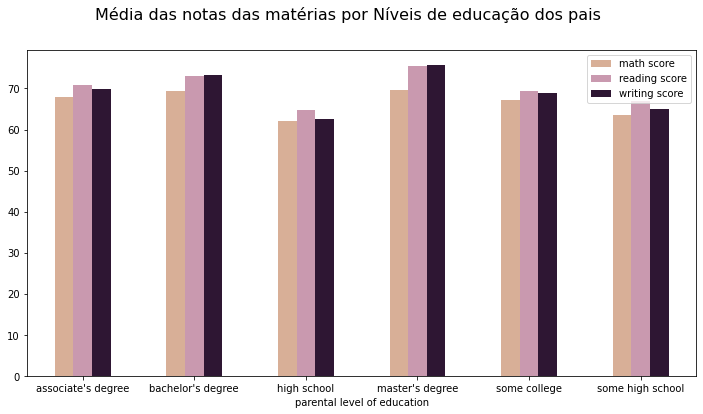

In [ ]:
#@title
cores = ['#d8af97', '#c999af', '#2e1633']
ax = dados_medias.plot(x='parental level of education', y=["math score", "reading score", "writing score"], kind="bar", rot=0, color = cores)

ax.figure.set_size_inches(12,6)
ax.figure.suptitle('Média das notas das matérias por Níveis de educação dos pais ', fontsize = 16)

Observando as medias das notas em cada disciplina, temos:
* Maiores médias em leitura e redação: pais com Mestrado
* Maiores médias em matemática: pais com Mestrado, Bacharelado ou Tecnólogo
* Menores médias, nas três matérias, se concentram em Ensino Médio Completo

<Axes: title={'center': 'Box-plot da Etnia por Genero e Média Geral'}, xlabel='general mean', ylabel='race/ethnicity'>

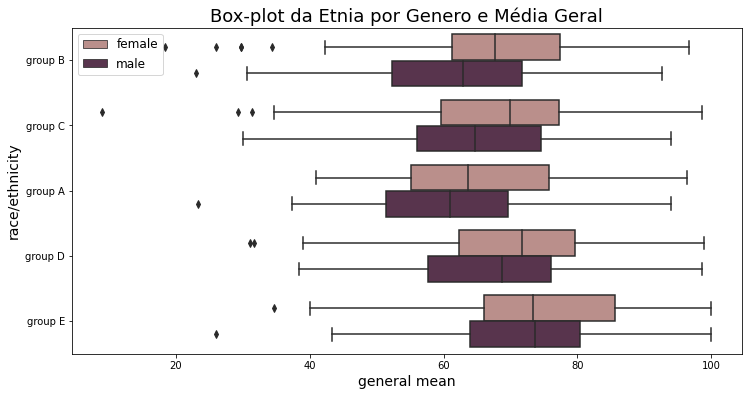

In [ ]:
#@title
#Box-plot da Etnia por Genero e Média Geral
ax = sns.boxplot(x='general mean', y = 'race/ethnicity', hue = 'gender', data=dados, orient='h', palette='ch:.25, dark=.25, light=.6')

ax.figure.set_size_inches(12, 6)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da Etnia por Genero e Média Geral', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('general mean', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('race/ethnicity', fontsize=14)    # Configurando o label do eixo Y
#ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['female', 'male'], fontsize=12)

ax

Levando a análise para gênero e etnia, destacam:
* Num geral, pessoas do gênero feminino tiveram desempenho superior em relação as do gênero masculino
* Valores de mediana próximos no Grupo E

In [ ]:
#@title
#Analise por genero e raça/etnia usando Max, Media e Mediana para média geral 
nota_por_genero_e_raca = pd.crosstab(dados['race/ethnicity'], 
                                                dados['gender'], 
                                                values = dados['general mean'], 
                                                aggfunc = {'mean', 'median', 'max' , 'min'}).round(2)
nota_por_genero_e_raca.rename(index = dados['race/ethnicity'], inplace = True)
nota_por_genero_e_raca.rename(columns = dados['gender'], inplace = True)
nota_por_genero_e_raca

max           mean        median           min       
gender          female    male female   male female   male female   male
race/ethnicity                                                          
group A          96.33   94.00  65.13  61.54  63.66  61.00  41.00  23.33
group B          96.67   92.67  67.51  63.00  67.67  62.84  18.33  23.00
group C          98.67   94.00  68.59  65.25  70.00  64.67   9.00  30.00
group D          99.00   98.67  71.44  66.99  71.67  68.67  31.00  38.33
group E         100.00  100.00  74.06  71.48  73.33  73.67  34.67  26.00

Observando valores, com a utilização da tabela:
* Ambos gêneros alcançaram média máxima no Grupo E
* Medianas no Grupo E próximas, com valor superior para pessoas do gênero masculino
* A diferença entre as médias das notas oscila em torno de uma média de 3.7 pontos

Quando focamos apenas na nota de matemática, percebemos que: 
- Com exceção do Grupo E, a nota máxima veio do genero masculino nos demais grupos. 
-Os grupos A e C Com exceção do Grupo E, a nota máxima veio do genero masculino nos demais grupos.



In [ ]:
#@title
#Analise por genero e raça/etnia usando Max, Media e Mediana para nota de matemática 
nota_por_genero_e_raca = pd.crosstab(dados['race/ethnicity'], 
                                                dados['gender'], 
                                                values = dados['math score'], 
                                                aggfunc = {'mean', 'median', 'max' ,'min'}).round(2)
nota_por_genero_e_raca.rename(index = dados['race/ethnicity'], inplace = True)
nota_por_genero_e_raca.rename(columns = dados['gender'], inplace = True)
nota_por_genero_e_raca

max        mean        median          min     
gender         female male female   male female  male female male
race/ethnicity                                                   
group A            92  100  58.53  63.74   57.0  63.0     34   28
group B            97   94  61.40  65.93   62.0  65.0      8   30
group C            96   98  62.03  67.61   63.0  68.0      0   27
group D            98  100  65.25  69.41   65.0  71.0     26   39
group E           100  100  70.81  76.75   71.0  78.0     32   30

<Axes: title={'center': 'Box-plot da Etnia por Genero e Nota Matemática'}, xlabel='math score', ylabel='race/ethnicity'>

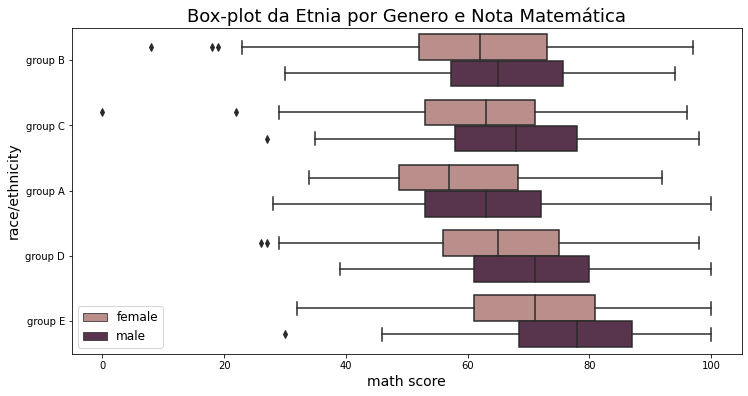

In [ ]:
#@title
#Box-plot da Etnia por Genero e Nota Matemática
ax = sns.boxplot(x='math score', y = 'race/ethnicity', hue = 'gender', data=dados, orient='h', palette='ch:.25, dark=.25, light=.6')

ax.figure.set_size_inches(12, 6)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da Etnia por Genero e Nota Matemática', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('math score', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('race/ethnicity', fontsize=14)    # Configurando o label do eixo Y
#ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['female', 'male'], fontsize=12)

ax

- O grupo A possui menos pessoas e proporcionalmente menos mulheres.

- Podemos observar que os outliers se concentram no genero feminino com notas de matemática abaixo de 30.

- Analisando apenas esses outliers percebemos que apenas duas pessoas tinham refeição padrão e completaram o teste preparatório e que não houve individuos do **Grupo E**

In [ ]:
#@title
dados[(dados['gender']=="female") & (dados['math score'] <30)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,general mean
17,female,group B,some high school,free/reduced,none,18,32,28,26.00
59,female,group C,some high school,free/reduced,none,0,17,10,9.00
145,female,group C,some college,free/reduced,none,22,39,33,31.33
338,female,group B,some high school,free/reduced,none,24,38,27,29.67
363,female,group D,some high school,free/reduced,none,27,34,32,31.00
466,female,group D,associate's degree,free/reduced,none,26,31,38,31.67
528,female,group D,bachelor's degree,free/reduced,none,29,41,47,39.00
601,female,group C,high school,standard,none,29,29,30,29.33
683,female,group C,some high school,free/reduced,completed,29,40,44,37.67
787,female,group B,some college,standard,none,19,38,32,29.67


In [ ]:
#@title
#Analise por genero e raça/etnia usando Max, Media e Mediana para nota de Leitura
nota_por_genero_e_raca = pd.crosstab(dados['race/ethnicity'], 
                                                dados['gender'], 
                                                values = dados['reading score'], 
                                                aggfunc = {'mean', 'median', 'max' ,'min'}).round(2)
nota_por_genero_e_raca.rename(index = dados['race/ethnicity'], inplace = True)
nota_por_genero_e_raca.rename(columns = dados['gender'], inplace = True)
nota_por_genero_e_raca

max        mean        median          min     
gender         female male female   male female  male female male
race/ethnicity                                                   
group A           100   96  69.00  61.74   67.5  61.0     43   23
group B            97   96  71.08  62.85   71.5  62.0     24   24
group C           100  100  71.94  65.42   73.0  66.0     17   28
group D           100   97  74.05  66.14   74.0  68.0     31   34
group E           100  100  75.84  70.30   76.0  73.0     34   26

<Axes: title={'center': 'Box-plot da Etnia por Genero e Nota Leitura'}, xlabel='reading score', ylabel='race/ethnicity'>

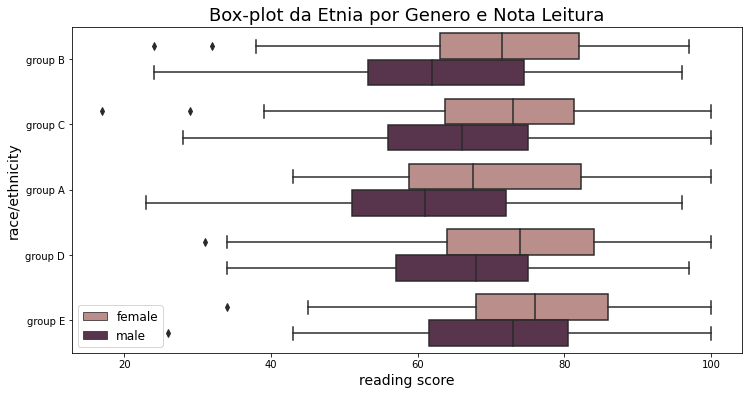

In [ ]:
#@title
#Box-plot da Etnia por Genero e Nota Matemática
ax = sns.boxplot(x='reading score', y = 'race/ethnicity', hue = 'gender', data=dados, orient='h', palette='ch:.25, dark=.25, light=.6')

ax.figure.set_size_inches(12, 6)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da Etnia por Genero e Nota Leitura', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('reading score', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('race/ethnicity', fontsize=14)    # Configurando o label do eixo Y
#ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['female', 'male'], fontsize=12)

ax

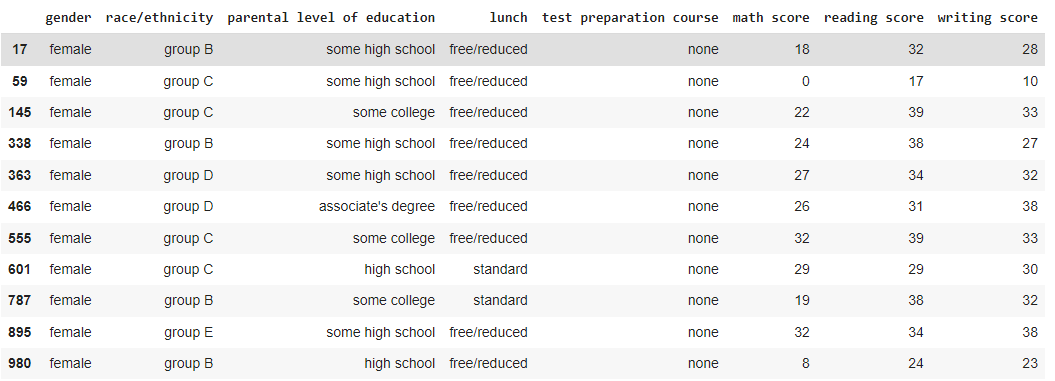

In [ ]:
#@title
#Analise por genero e raça/etnia usando Max, Media e Mediana para nota de Redação 
nota_por_genero_e_raca = pd.crosstab(dados['race/ethnicity'], 
                                                dados['gender'], 
                                                values = dados['writing score'], 
                                                aggfunc = {'mean', 'median', 'max' ,'min'}).round(2)
nota_por_genero_e_raca.rename(index = dados['race/ethnicity'], inplace = True)
nota_por_genero_e_raca.rename(columns = dados['gender'], inplace = True)
nota_por_genero_e_raca

max        mean        median          min     
gender         female male female   male female  male female male
race/ethnicity                                                   
group A            97   92  67.86  59.15   67.0  60.0     41   19
group B            96   92  70.05  60.22   71.5  60.0     23   15
group C           100   95  71.78  62.71   74.0  62.0     10   27
group D           100   99  75.02  65.41   76.0  67.0     32   34
group E           100  100  75.54  67.39   76.0  70.0     38   22

<Axes: title={'center': 'Box-plot da Etnia por Genero e Nota Redação'}, xlabel='writing score', ylabel='race/ethnicity'>

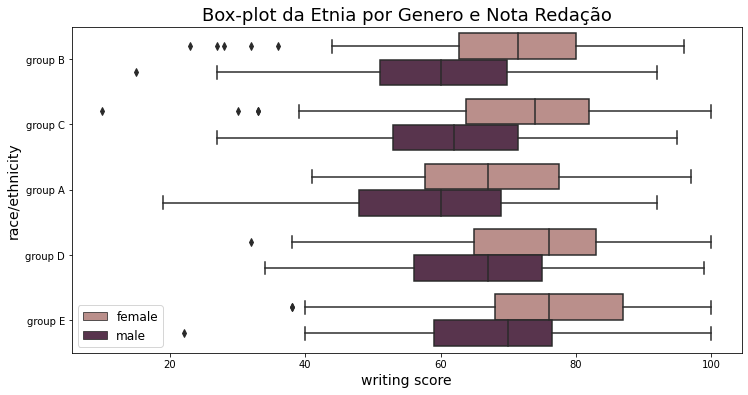

In [ ]:
#@title
#Box-plot da Etnia por Genero e Nota Matemática
ax = sns.boxplot(x='writing score', y = 'race/ethnicity', hue = 'gender', data=dados, orient='h', palette='ch:.25, dark=.25, light=.6')

ax.figure.set_size_inches(12, 6)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da Etnia por Genero e Nota Redação', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('writing score', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('race/ethnicity', fontsize=14)    # Configurando o label do eixo Y
#ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['female', 'male'], fontsize=12)

ax

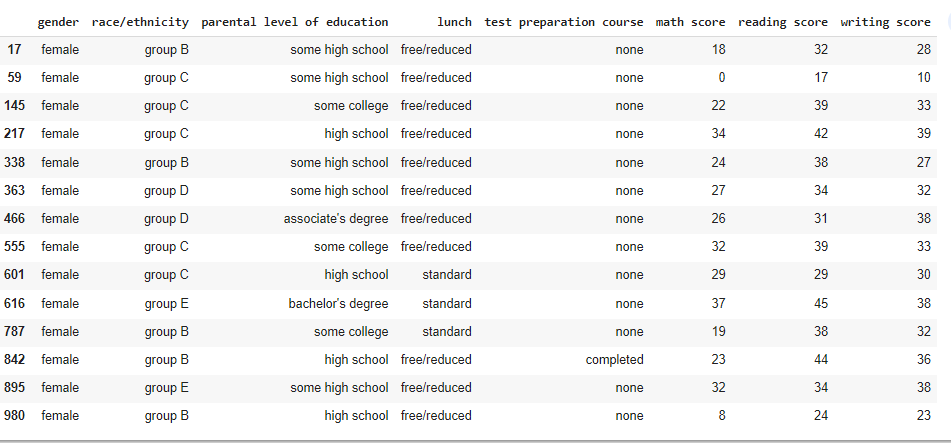

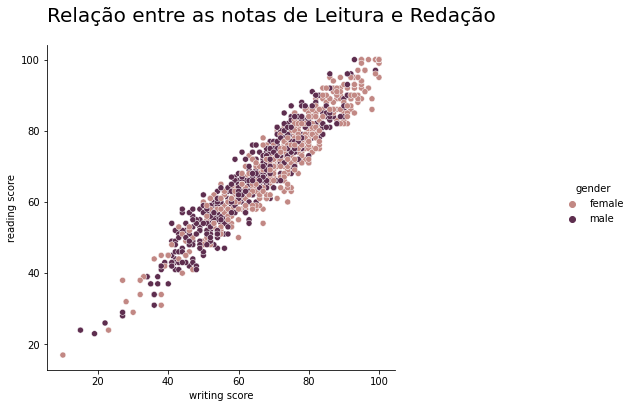

In [ ]:
#@title
ax = sns.pairplot(dados, y_vars='reading score', x_vars='writing score', hue='gender', palette='ch:.25, dark=.25, light=.6')
ax.fig.suptitle('Relação entre as notas de Leitura e Redação', fontsize=20, y=1.05)
ax.figure.set_size_inches(10, 6)
sns.color_palette('Paired')
ax

###2. A organização da squad

A squad se organizou levando em consideração a disponibilidade de cada integrante. Com isto, foram tomadas algumas ações:
* Divisão em duplas;
* Os desafios foram divididos conforme quantidade de itens a serem resolvidos;
* Cada dupla era independente, porém precisava resolver os desafios em conjunto;
* Um colab foi criado para unificar as resoluções;
* Todas estavam disponível para ajudar as outras caso fosse preciso. 

###3. Facilidades e dificuldades no desenvolvimento do desafio

Facilidades
* Suporte do curso da Alura e materiais disponibilizados;
* Mentoria para tirar dúvidas;
* Materiais e conteúdos de fácil acesso disponíveis na internet, em sites e fóruns;
* Organização do grupo.

Dificuldades
* Parte teórica de estatística, sensação de que faltava alguma base;
* Conciliação da agenda entre as integrantes;
* *Entender o que significa cada variável - mesmo a gente procurando no google, não achava algumas informações ou não dava pra confiar - exemplo: raça/ethnia*;
* *Extrair informações e insigths das análises realizadas*;
* *Definir qual teste de hipótese era o melhor para desenvolvimento do desafio 3*;
* *Tratamento de dados/outliers*;